In [3]:
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

RANDOM_STATE = 42

import warnings
warnings.filterwarnings('ignore')

In [4]:
use_cols = [
    'Invoice',
    'Description'
]

data = pd.read_excel('data/UK_Retail.xlsx', usecols = use_cols)

In [5]:
data.head()

,Invoice,Description
0,C581484,"PAPER CRAFT , LITTLE BIRDIE"
1,C541433,MEDIUM CERAMIC TOP STORAGE JAR
2,C536757,ROTATING SILVER ANGELS T-LIGHT HLDR
3,C536757,ROTATING SILVER ANGELS T-LIGHT HLDR
4,C550456,FAIRY CAKE FLANNEL ASSORTED COLOUR


# Preprocess

In [6]:
# Data Preprocess

data.dropna(inplace=True) # Drop null values
data['Description'] = data['Description'].apply(lambda x: x.strip()) # Remove trailing/leading whitespace
data['Invoice'] = data['Invoice'].astype(str)
data = data[~data['Invoice'].str.contains('C')] #Remove cancelled transactions
data.rename(columns={'Invoice':'Transaction', 'Description':'Items'}, inplace=True)

data.head()

,Transaction,Items
15395,489437,JOY LARGE WOOD LETTERS
15396,489445,EDWARDIAN TOILET ROLL UNIT
15397,489488,CHARLIE LOLA BLUE HOT WATER BOTTLE
15398,489488,CHARLIE+LOLA PINK HOT WATER BOTTLE
15399,489488,CHARLIE + LOLA RED HOT WATER BOTTLE


In [7]:
num_items = len(set(data['Items']))
num_transactions = len(set(data['Transaction']))
print(f'Unique Transactions: {num_transactions} - Unique Items: {num_items}')

Unique Transactions: 33363 - Unique Items: 5195


## Create Basket

In [8]:
data['Value'] = 1
grouped = data.groupby(['Transaction','Items'])['Value'].sum().reset_index()
basket = grouped.pivot(index='Transaction', columns='Items', values='Value').fillna(0)
basket = basket.astype(bool).astype(int)
basket

Items,10 COLOUR SPACEBOY PEN,11 PC CERAMIC TEA SET POLKADOT,12 ASS ZINC CHRISTMAS DECORATIONS,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 MINI TOADSTOOL PEGS,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Transaction,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from scipy.sparse import issparse, csr_matrix

if issparse(basket):
    sparse_basket = csr_matrix(basket)

# Apriori Algorithm


## Metrics
X/Y - itemsets
#### Support -
An indication of how frequently the item set appears in the data set. 

supp(X⇒Y)=|X∪Y|/n - it’s the number of transactions with both X and Y divided by the total number of transactions.

Rules with low support mean they don't occur often enough and so are not as useful.

range [0,1]

#### Confidence
Confidence shows the percentage in which Y is bought with X. It’s an indication of how often the rule has been found to be true.

conf(X⇒Y)=supp(X∪Y)/supp(X) - e.g. A cofidence of 75% means that 75% of the times a customer buys X, Y is bought as well

range [0,1]

#### Lift
The ratio of the observed support to that expected if X and Y were independent, and is defined as

lift(X⇒Y)=supp(X∪Y)/supp(X)supp(Y) - If X and Y are independent, the Lift score will be exactly 1. 

If lift is less than 1, then the occurrence of X is negatively correlated with the occurrence of Y, meaning that the occurrence of one likely leads to the absence of the other one.

If the resulting value is greater than 1, then X and Y are positively correlated, meaning that the occurrence of one implies the occurrence of the other.

range [0,inf]

#### Conviction
A high value means that the consequent(Y) depends strongly on the antecedent(X).

conv(X⇒Y)=1−supp(Y)/1−conf(X⇒Y) -  The case of a perfect confidence score, the denominator becomes 0 (due to 1 - 1) for which the conviction score is defined as 'inf'. Similar to lift, if items are independent, the conviction is 1.

range [0,inf]

In [10]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda iset: len(iset))
frequent_itemsets

,support,itemsets,length
0,0.023379,(3 STRIPEY MICE FELTCRAFT),1
1,0.035488,(6 RIBBONS RUSTIC CHARM),1
2,0.021940,(60 CAKE CASES VINTAGE CHRISTMAS),1
3,0.047508,(60 TEATIME FAIRY CAKE CASES),1
4,0.031742,(72 SWEETHEART FAIRY CAKE CASES),1
...,...,...,...
177,0.021251,"(LUNCH BAG CARS BLUE, LUNCH BAG BLACK SKULL.)",2
178,0.021910,"(LUNCH BAG SPACEBOY DESIGN, LUNCH BAG BLACK SKULL.)",2
179,0.032791,"(WHITE HANGING HEART T-LIGHT HOLDER, RED HANGING HEART T-LIGHT HOLDER)",2
180,0.022660,"(STRAWBERRY CERAMIC TRINKET BOX, SWEETHEART CERAMIC TRINKET BOX)",2


In [11]:
# Frequent itemsets with more than one item
frequent_itemsets[frequent_itemsets['length'] >= 2].sort_values(by='support', ascending=False)

,support,itemsets,length
179,0.032791,"(WHITE HANGING HEART T-LIGHT HOLDER, RED HANGING HEART T-LIGHT HOLDER)",2
181,0.029134,"(WOODEN PICTURE FRAME WHITE FINISH, WOODEN FRAME ANTIQUE WHITE)",2
173,0.025627,"(HEART OF WICKER LARGE, HEART OF WICKER SMALL)",2
174,0.022900,"(LOVE BUILDING BLOCK WORD, HOME BUILDING BLOCK WORD)",2
180,0.022660,"(STRAWBERRY CERAMIC TRINKET BOX, SWEETHEART CERAMIC TRINKET BOX)",2
178,0.021910,"(LUNCH BAG SPACEBOY DESIGN, LUNCH BAG BLACK SKULL.)",2
177,0.021251,"(LUNCH BAG CARS BLUE, LUNCH BAG BLACK SKULL.)",2
175,0.020921,"(JUMBO BAG RED RETROSPOT, JUMBO BAG STRAWBERRY)",2
176,0.020831,"(JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SUKI)",2


### Interpretation 
#### Example 
X = LOVE BUILDING BLOCK WORD, Y = HOME BUILDING BLOCK WORD

Support - (X, Y) occur in 2% of all transactions ~ 667 transactions

Cofidence of 53% means that 53% of the times a customer buys X, Y is bought as well

Lift - Positive list meaning that occurence of X likely leads to the occurence of Y

Conviction - The higher value means that the consequent(Y) depends strongly on the antecedent(X).

In [104]:
# metric - accepted arguments = support, confidence, lift, leverage, and conviction
associations = association_rules(frequent_itemsets, metric="lift", min_threshold=float('-inf'), support_only=False)
round(associations, 2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.05,0.05,0.03,0.50,9.58,0.02,1.88
1,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.05,0.05,0.03,0.49,9.58,0.02,1.88
2,(LOVE BUILDING BLOCK WORD),(HOME BUILDING BLOCK WORD),0.04,0.05,0.02,0.53,9.97,0.02,2.01
3,(HOME BUILDING BLOCK WORD),(LOVE BUILDING BLOCK WORD),0.05,0.04,0.02,0.43,9.97,0.02,1.68
4,(JUMBO BAG RED RETROSPOT),(JUMBO BAG STRAWBERRY),0.07,0.04,0.02,0.29,6.74,0.02,1.35
5,(JUMBO BAG STRAWBERRY),(JUMBO BAG RED RETROSPOT),0.04,0.07,0.02,0.48,6.74,0.02,1.80
6,(JUMBO BAG RED RETROSPOT),(JUMBO STORAGE BAG SUKI),0.07,0.05,0.02,0.29,6.00,0.02,1.34
7,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.05,0.07,0.02,0.43,6.00,0.02,1.63
8,(LUNCH BAG CARS BLUE),(LUNCH BAG BLACK SKULL.),0.05,0.06,0.02,0.43,7.61,0.02,1.67
9,(LUNCH BAG BLACK SKULL.),(LUNCH BAG CARS BLUE),0.06,0.05,0.02,0.37,7.61,0.02,1.52


### Other Evaluation Methods
Lift is sensitive to the total number of transaction, which can become unstable at different levels such as from day to day. A good interestingness measure shouldn't be influenced by the number of transactions as this can lead to unstable results.

#### all confidence
all_conf(X,Y) = sup(X U Y)/ MAX(sup(X),sup(Y))
#### max confidence
max_conf(X,Y) = sup(X U Y)/ MIN(sup(X),sup(Y))
#### Kulczynski
Kulc(X,Y) =  1/2(sup(X U Y) / sup(X) + sup(Y))
#### cosine.
cosine(X,Y) = sup(X U Y) / sqrt(sup(X) x sup(Y))

All four measures defined has the following properties:

Its value is only influenced by the supports of A, B, and A U B, or more exactly, by the conditional probabilities
of P(A|B) and P(B|A), but not by the total number of transactions. 

Another common property is that each measure ranges from 0 to 1, and the higher the value, the closer the relationship between A and B.

In [123]:
associations['all_conf'] = associations['support'] / np.maximum(associations['antecedent support'], associations['consequent support'])
associations['max_conf'] = associations['support'] / np.minimum(associations['antecedent support'], associations['consequent support'])
associations['Kulc'] = ((associations['support'] / associations['antecedent support']) + (associations['support'] / associations['consequent support'])) / 2
associations['cosine'] = associations['support'] / np.sqrt(associations['antecedent support'] * associations['consequent support'])

In [81]:
round(associations, 2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,all_conf,max_conf,Kulc,cosine
0,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.05,0.05,0.03,0.50,9.58,0.02,1.88,0.49,0.50,0.50,0.50
1,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.05,0.05,0.03,0.49,9.58,0.02,1.88,0.49,0.50,0.50,0.50
2,(LOVE BUILDING BLOCK WORD),(HOME BUILDING BLOCK WORD),0.04,0.05,0.02,0.53,9.97,0.02,2.01,0.43,0.53,0.48,0.48
3,(HOME BUILDING BLOCK WORD),(LOVE BUILDING BLOCK WORD),0.05,0.04,0.02,0.43,9.97,0.02,1.68,0.43,0.53,0.48,0.48
4,(JUMBO BAG RED RETROSPOT),(JUMBO BAG STRAWBERRY),0.07,0.04,0.02,0.29,6.74,0.02,1.35,0.29,0.48,0.39,0.38
5,(JUMBO BAG STRAWBERRY),(JUMBO BAG RED RETROSPOT),0.04,0.07,0.02,0.48,6.74,0.02,1.80,0.29,0.48,0.39,0.38
6,(JUMBO BAG RED RETROSPOT),(JUMBO STORAGE BAG SUKI),0.07,0.05,0.02,0.29,6.00,0.02,1.34,0.29,0.43,0.36,0.35
7,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.05,0.07,0.02,0.43,6.00,0.02,1.63,0.29,0.43,0.36,0.35
8,(LUNCH BAG CARS BLUE),(LUNCH BAG BLACK SKULL.),0.05,0.06,0.02,0.43,7.61,0.02,1.67,0.37,0.43,0.40,0.40
9,(LUNCH BAG BLACK SKULL.),(LUNCH BAG CARS BLUE),0.06,0.05,0.02,0.37,7.61,0.02,1.52,0.37,0.43,0.40,0.40


## Imbalance Ratio (IR)

assesses the imbalance of two itemsets, X and Y, in rule implications.

The larger the difference between the two, the larger the imbalance ratio. A perfectly balanced rule has an IR of 0, whilst a heavily skewed case has an IR closer to 1

Kulc and IR are recommended as metrics used for evaluation

In [124]:
associations['imbalance_ratio'] = abs(associations['antecedent support'] - associations['consequent support']) / ((associations['antecedent support'] + associations['consequent support']) - associations['support']) 

In [83]:
round(associations, 2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,all_conf,max_conf,Kulc,cosine,imbalance_ratio
0,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.05,0.05,0.03,0.50,9.58,0.02,1.88,0.49,0.50,0.50,0.50,0.00
1,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.05,0.05,0.03,0.49,9.58,0.02,1.88,0.49,0.50,0.50,0.50,0.00
2,(LOVE BUILDING BLOCK WORD),(HOME BUILDING BLOCK WORD),0.04,0.05,0.02,0.53,9.97,0.02,2.01,0.43,0.53,0.48,0.48,0.13
3,(HOME BUILDING BLOCK WORD),(LOVE BUILDING BLOCK WORD),0.05,0.04,0.02,0.43,9.97,0.02,1.68,0.43,0.53,0.48,0.48,0.13
4,(JUMBO BAG RED RETROSPOT),(JUMBO BAG STRAWBERRY),0.07,0.04,0.02,0.29,6.74,0.02,1.35,0.29,0.48,0.39,0.38,0.30
5,(JUMBO BAG STRAWBERRY),(JUMBO BAG RED RETROSPOT),0.04,0.07,0.02,0.48,6.74,0.02,1.80,0.29,0.48,0.39,0.38,0.30
6,(JUMBO BAG RED RETROSPOT),(JUMBO STORAGE BAG SUKI),0.07,0.05,0.02,0.29,6.00,0.02,1.34,0.29,0.43,0.36,0.35,0.23
7,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.05,0.07,0.02,0.43,6.00,0.02,1.63,0.29,0.43,0.36,0.35,0.23
8,(LUNCH BAG CARS BLUE),(LUNCH BAG BLACK SKULL.),0.05,0.06,0.02,0.43,7.61,0.02,1.67,0.37,0.43,0.40,0.40,0.09
9,(LUNCH BAG BLACK SKULL.),(LUNCH BAG CARS BLUE),0.06,0.05,0.02,0.37,7.61,0.02,1.52,0.37,0.43,0.40,0.40,0.09


## Visualise Rules

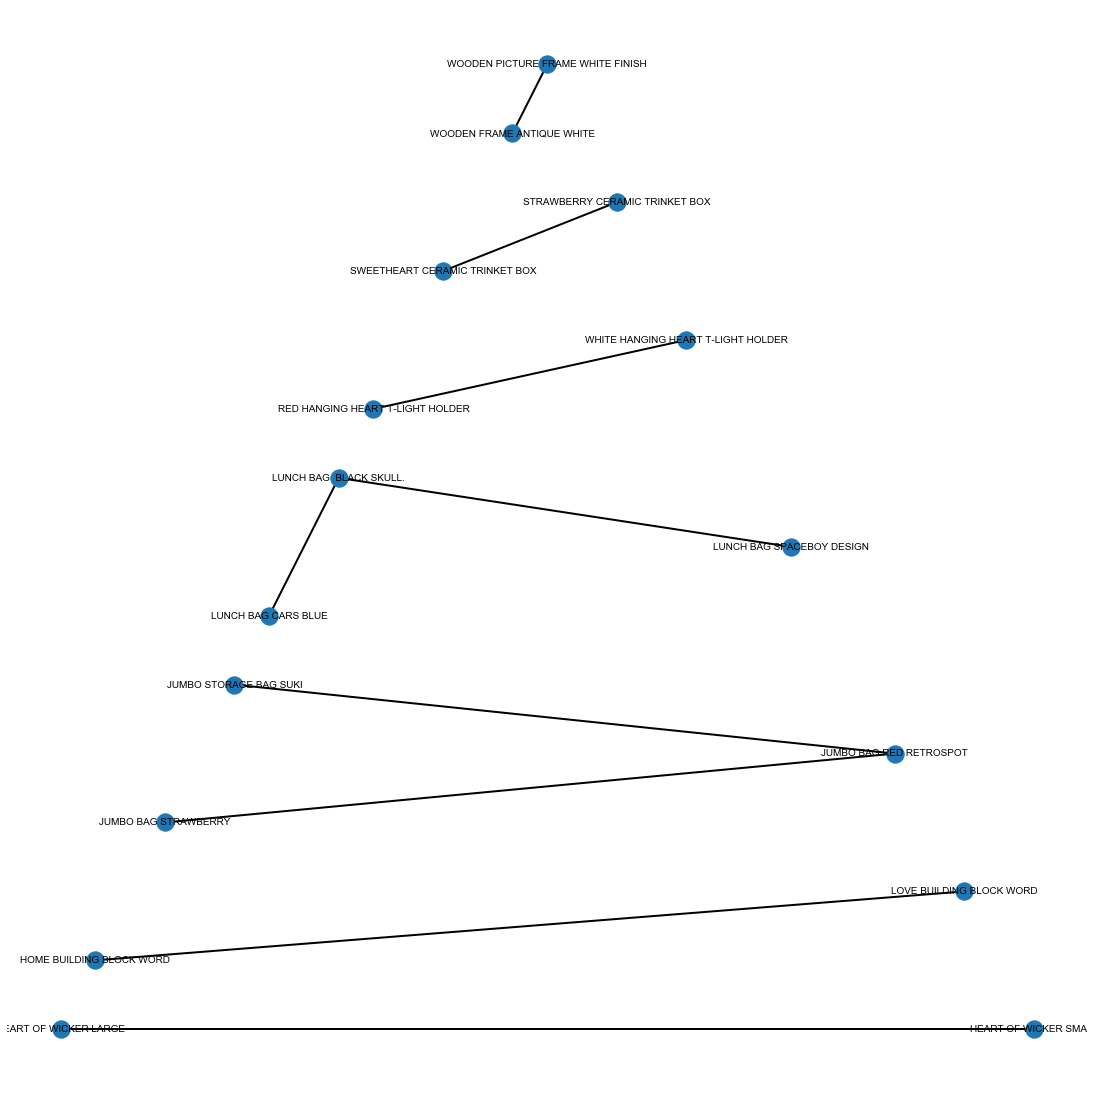

In [149]:
import networkx as nx

plt.figure(figsize=(15,15)) 
associations["antecedents"] = associations["antecedents"].apply(lambda item: ''.join(list(item))).astype(str)
associations["consequents"] = associations["consequents"].apply(lambda item: ''.join(list(item))).astype(str)
G = nx.from_pandas_edgelist(associations, source='antecedents',target='consequents')
pos = nx.planar_layout(G)
nx.draw(G, with_labels=True, pos=pos, width=2, font_size=10)